In [1]:
from utils import sort_csv_for_channel, make_datasets, get_data_from_csv
from analysis_functions import g2, gaussian
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy as np


%load_ext autoreload
%autoreload 2

In [2]:
channels_files_sorted=sort_csv_for_channel(r"HBT_data")

In [3]:
dataset_dict=make_datasets(channels_files_sorted)

HBT_data\-15_Ch1.csv
HBT_data\-14_Ch1.csv
HBT_data\-13_Ch1.csv
HBT_data\-12_Ch1.csv
HBT_data\-11_Ch1.csv
HBT_data\-10_Ch1.csv
HBT_data\-9_Ch1.csv
HBT_data\-8_Ch1.csv
HBT_data\-7_Ch1.csv
HBT_data\-6_Ch1.csv
HBT_data\-5_Ch1.csv
HBT_data\-4_Ch1.csv
HBT_data\-3_Ch1.csv
HBT_data\-2_Ch1.csv
HBT_data\-1_Ch1.csv
HBT_data\0_Ch1.csv
HBT_data\+1_Ch1.csv
HBT_data\+2_Ch1.csv
HBT_data\+3_Ch1.csv
HBT_data\+4_Ch1.csv
HBT_data\+5_Ch1.csv
HBT_data\+6_Ch1.csv
HBT_data\+7_Ch1.csv
HBT_data\+8_Ch1.csv
HBT_data\+9_Ch1.csv
HBT_data\+10_Ch1.csv
HBT_data\+11_Ch1.csv
HBT_data\+12_Ch1.csv
HBT_data\+13_Ch1.csv
HBT_data\+14_Ch1.csv
HBT_data\+15_Ch1.csv
HBT_data\-15_Ch2.csv
HBT_data\-14_Ch2.csv
HBT_data\-13_Ch2.csv
HBT_data\-12_Ch2.csv
HBT_data\-11_Ch2.csv
HBT_data\-10_Ch2.csv
HBT_data\-9_Ch2.csv
HBT_data\-8_Ch2.csv
HBT_data\-7_Ch2.csv
HBT_data\-6_Ch2.csv
HBT_data\-5_Ch2.csv
HBT_data\-4_Ch2.csv
HBT_data\-3_Ch2.csv
HBT_data\-2_Ch2.csv
HBT_data\-1_Ch2.csv
HBT_data\0_Ch2.csv
HBT_data\+1_Ch2.csv
HBT_data\+2_Ch2.csv
HBT_

In [4]:
dataset_dict['Ch1'].shape

(31, 50000)

In [5]:
#compute g2
g2 = g2(dataset_dict, normalize=True) 


In [6]:
# measure range
x_min = -15
x_max = 15

# real range
a = -3  # mm
b = 3   # mm

# rescaling
g2.index = ((g2.index - x_min) / (x_max - x_min)) * (b - a) + a

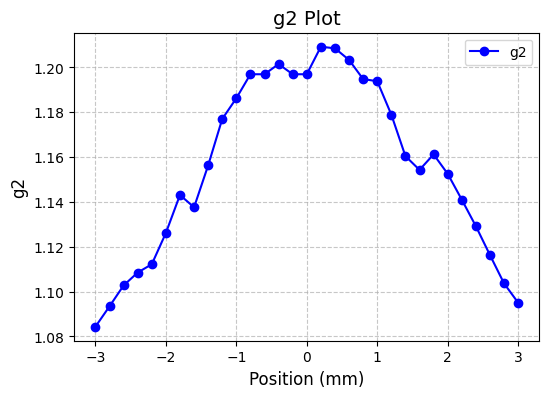

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(g2, label='g2', color='blue', linestyle='-', marker='o')
plt.xlabel('Position (mm)', fontsize=12)
plt.ylabel('g2', fontsize=12)
plt.title('g2 Plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [10]:
#gaussian fit
parameters, covariance = curve_fit(gaussian, g2.index, g2.values) 

In [27]:
parameters
errors = np.sqrt(np.diag(covariance))
print("Errori standard dei parametri:")
print(errors)

Errori standard dei parametri:
[0.00243077 0.03462546 0.13936582]


<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\annid\AppData\Local\Temp\ipykernel_13180\130014339.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes,
C:\Users\annid\AppData\Local\Temp\ipykernel_13180\130014339.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes,


Text(0.05, 0.95, '$\\mu=0.13$\n$\\sigma=6.56$\nFWHM=15.44')

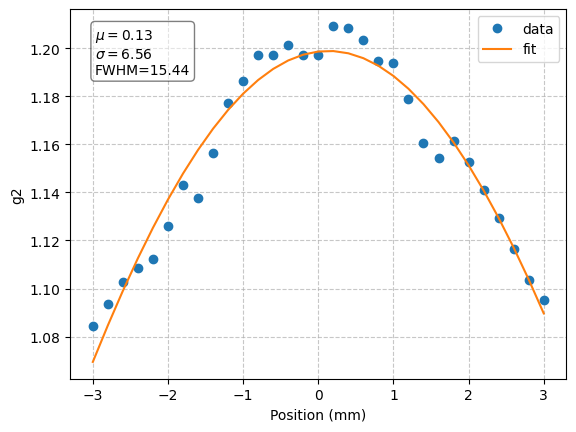

In [28]:
fit_A = parameters[0] 
fit_mu = parameters[1] 
fit_sigma = parameters[2]
x = g2.index
fwhm = 2 * np.sqrt(2 * np.log(2)) * fit_sigma


fit_g2 = gaussian(x, fit_A, fit_mu, fit_sigma) 
plt.plot(x, g2, 'o', label='data') 
plt.plot(x, fit_g2, '-', label='fit') 
# x_domain = np.linspace(-7,7,140)
# plt.plot(x_domain, gaussian(x_domain, fit_A, fit_mu, fit_sigma), '--', label='fit_large_domain')
plt.xlabel('Position (mm)')
plt.ylabel('g2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\annid\AppData\Local\Temp\ipykernel_13180\1128423006.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes,
C:\Users\annid\AppData\Local\Temp\ipykernel_13180\1128423006.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes,


Text(0.05, 0.95, '$\\mu=0.13$\n$\\sigma=6.56$\nFWHM=15.44')

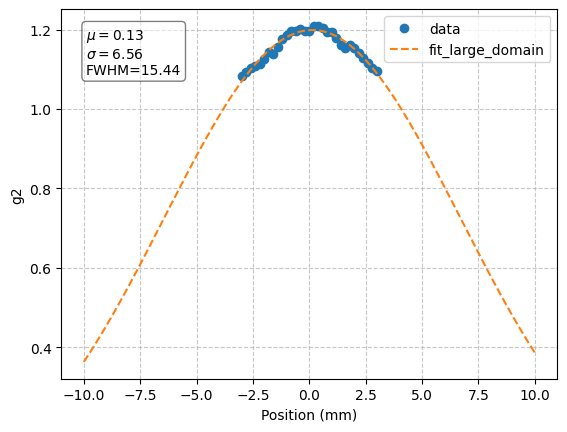

In [30]:
plt.plot(x, g2, 'o', label='data') 
x_domain = np.linspace(-10,10,1000)
plt.plot(x_domain, gaussian(x_domain, fit_A, fit_mu, fit_sigma), '--', label='fit_large_domain')
plt.xlabel('Position (mm)')
plt.ylabel('g2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.text(0.05, 0.95, f'$\mu={fit_mu:.2f}$\n$\sigma={fit_sigma:.2f}$\nFWHM={fwhm:.2f}', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))